In [397]:
##Importing most of the libraries we have used in our assignments that we will use in this project

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

from sklearn import metrics
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from numpy import array
from numpy import argmax


# Read in the CSV file we will be using for this project 
df = pd.read_csv("./AB_NYC_2019.csv")
df[0::10]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
30,9668,front room/double bed,32294,Ssameer Or Trip,Manhattan,Harlem,40.82245,-73.95104,Private room,50,3,242,2019-06-01,2.04,3,355
40,12192,ENJOY Downtown NYC!,46978,Edward,Manhattan,East Village,40.72290,-73.98199,Private room,68,2,245,2019-06-21,2.08,2,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48850,36455584,Large studio at Union Square! for 3-5 ppl,50812891,Molo,Manhattan,East Village,40.73231,-73.98689,Entire home/apt,159,1,0,NaN,NaN,1,166
48860,36468386,纽约罗岛Roosevelt Island整租或合租 窗外美景 设施全 家具新 到曼哈顿方便 ...,228268650,Yan,Manhattan,Roosevelt Island,40.76688,-73.94688,Entire home/apt,145,1,0,NaN,NaN,1,30
48870,36474911,"Cozy, clean Williamsburg 1- bedroom apartment",1273444,Tanja,Brooklyn,Williamsburg,40.71197,-73.94946,Entire home/apt,99,4,0,NaN,NaN,1,22
48880,36481315,The Raccoon Artist Studio in Williamsburg New ...,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,120,1,0,NaN,NaN,3,365


## Data analysis

In [398]:
# Price
df["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [399]:
# neighbourhood groups
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [400]:
# Avg Price in neighbourhood groups
avg_price = df.groupby("neighbourhood_group")["price"].mean()

print(avg_price)

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64


In [401]:
#Replace the Nan values in last_review and reviews_per_month colum with 0
df[['last_review','reviews_per_month']] = df[['last_review','reviews_per_month']].replace(np.nan, 0)
#check data to make sure the change occured
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [402]:
#check all the numerical value data
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [403]:
#get rid of any listing that has obtained $0 for price
df = df[df.price != 0].copy()
#df = df[df.price < 601].copy()
#df =df[df.minimum_nights > 100].copy()
df.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,1.901679e+07,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,1.098432e+07,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.470548e+06,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967574e+07,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915297e+07,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [404]:
df['name'].value_counts()

Hillside Hotel                                       18
Home away from home                                  17
New york Multi-unit building                         16
Brooklyn Apartment                                   12
Private Room                                         11
                                                     ..
Crown Heights Great Single Bedroom                    1
Stuvesant East                                        1
Double bedroom downtown                               1
Spacious & Bright Artist Retreat                      1
Spacious room w/ ensuite in heart of East Village     1
Name: name, Length: 47894, dtype: int64

In [405]:
df['neighbourhood_group'].value_counts()

Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [406]:
df['neighbourhood'].value_counts()

Williamsburg          3919
Bedford-Stuyvesant    3710
Harlem                2658
Bushwick              2462
Upper West Side       1971
                      ... 
Rossville                1
Fort Wadsworth           1
Woodrow                  1
Willowbrook              1
Richmondtown             1
Name: neighbourhood, Length: 221, dtype: int64

In [407]:
df['room_type'].value_counts()

Entire home/apt    25407
Private room       22319
Shared room         1158
Name: room_type, dtype: int64

In [408]:
#one hot encoding  of room type

# !!! DONT RUN TWICE IT WILL KEEP CONCATING THE HOT ENCODED LABELS !!!
df = pd.concat([df,pd.get_dummies(df['room_type'])],axis=1)
df.head()
# !!! DONT RUN TWICE IT WILL KEEP CONCATING THE HOT ENCODED LABELS !!!



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0,1,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,0,1,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,1,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,1,0,0


In [409]:
#Drop the Room type column
df = df.drop(columns=['room_type'])
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,0,1,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,150,3,0,0,0.00,1,365,0,1,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,1,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,1,0,0


In [410]:
#one hot encode neighbourhood group
# !!! DONT RUN TWICE IT WILL KEEP CONCATING THE HOT ENCODED LABELS !!!
df = pd.concat([df,pd.get_dummies(df['neighbourhood_group'])],axis=1)
# !!! DONT RUN TWICE IT WILL KEEP CONCATING THE HOT ENCODED LABELS !!!
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,...,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,149,1,...,6,365,0,1,0,0,1,0,0,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,225,1,...,2,355,1,0,0,0,0,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,150,3,...,1,365,0,1,0,0,0,1,0,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,89,1,...,1,194,1,0,0,0,1,0,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,80,10,...,1,0,1,0,0,0,0,1,0,0


In [411]:
#dropped the neighbourhood group after encoding it
df = df.drop(columns =['neighbourhood_group'])
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,9,...,6,365,0,1,0,0,1,0,0,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,...,2,355,1,0,0,0,0,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,...,1,365,0,1,0,0,0,1,0,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,...,1,194,1,0,0,0,1,0,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,...,1,0,1,0,0,0,0,1,0,0


In [412]:
#dropping the id, host id, host name since it should have no affect on the price of the listing
df = df.drop(columns = ['id','host_id','host_name'])
df.head()

,name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,Clean & quiet apt home by the park,Kensington,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,0,1,0,0,1,0,0,0
1,Skylit Midtown Castle,Midtown,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,1,0,0,0,0,1,0,0
2,THE VILLAGE OF HARLEM....NEW YORK !,Harlem,40.80902,-73.94190,150,3,0,0,0.00,1,365,0,1,0,0,0,1,0,0
3,Cozy Entire Floor of Brownstone,Clinton Hill,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,1,0,0,0,1,0,0,0
4,Entire Apt: Spacious Studio/Loft by central park,East Harlem,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,1,0,0,0,0,1,0,0


In [413]:
names = df['name'].iloc[1]
print(names)
neigh = df['neighbourhood']
#print(neigh[0])
neigh_listA = []
for x in neigh:
    if x not in neigh_listA:
        neigh_listA.append(x)
        
print(len(neigh_listA))


Skylit Midtown Castle
221


In [414]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

redundant_words = ['room','apartment','bedroom','1','2','!',',','&','.','-',')','(',
                  'apt','studio','loft','w/','+','*','brooklyn','manhattan','nyc','east',
                  'west','south','north','3','Bronx', 'Queens','Staten Island','1br','bed','near',
                  'williamsburg','bushwick','side','midtown','lower','upper','one','brownstone','br',
                  'home','location','harlem','square']
top_words = 20
txt = df.name.str.lower().str.replace(r'\|',' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords_t = nltk.corpus.stopwords.words('english')
stopwords_t.extend(redundant_words)
stopwords_t.extend(neigh_listA)
words_notstop_dist = nltk.FreqDist(w for w in words if w not in stopwords_t)

rslt = pd.DataFrame(words_notstop_dist.most_common(top_words),columns=['Word','Freq'])
print("Frequency of top occuring words")
print("-------------------------------")
print(rslt)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sean_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sean_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Frequency of top occuring words
-------------------------------
         Word  Freq
0     private  7170
1        cozy  5035
2    spacious  3743
3        park  3050
4       sunny  2903
5   beautiful  2489
6     village  2246
7       heart  2050
8       large  2049
9      modern  1783
10    central  1760
11     bright  1700
12     luxury  1672
13        new  1547
14   charming  1377
15      quiet  1224
16      great  1155
17      clean  1117
18      close  1034
19       huge   961


<AxesSubplot:>

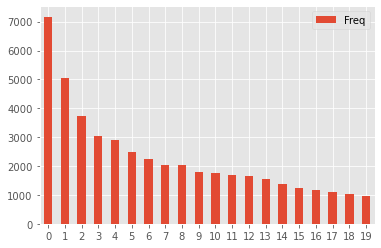

In [415]:
import matplotlib
import matplotlib.pyplot as plt


matplotlib.style.use('ggplot')
rslt.plot.bar(rot=0)

In [416]:
freq_words = ['private','cozy','spacious','park','sunny',
              'beautiful','village','heart','large','modern',
             'central','bright','luxury','new','charming',
             'quiet','great','clean','close','huge']
#want to lower case all the words in my previous stopwords_t list
l = [item.lower() for item in stopwords_t]

def encode_names(name,fword,stops):
    
    word_counter = 0
    stoppingwords = stops
    txt = nltk.tokenize.word_tokenize(str(name).lower())
    ready_txt =[x for x in txt if x not in stops]
    
    for word in ready_txt:
        if word in fword:
            return 1
        else:
            continue
            
    return 0



print(len(df.index))

name_df = []


name_df = df['name'].apply(lambda x : encode_names(x,freq_words,l))
    


48884


In [417]:
name_df[::]

0        1
1        0
2        1
3        1
4        1
        ..
48890    1
48891    0
48892    1
48893    0
48894    1
Name: name, Length: 48884, dtype: int64

In [418]:
df['name_encode'] = name_df
df.head()

,name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island,name_encode
0,Clean & quiet apt home by the park,Kensington,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,0,1,0,0,1,0,0,0,1
1,Skylit Midtown Castle,Midtown,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,1,0,0,0,0,1,0,0,0
2,THE VILLAGE OF HARLEM....NEW YORK !,Harlem,40.80902,-73.94190,150,3,0,0,0.00,1,365,0,1,0,0,0,1,0,0,1
3,Cozy Entire Floor of Brownstone,Clinton Hill,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,1,0,0,0,1,0,0,0,1
4,Entire Apt: Spacious Studio/Loft by central park,East Harlem,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,1,0,0,0,0,1,0,0,1


In [419]:
df = df.drop(columns = ['name','last_review'])
df.head()


,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island,name_encode
0,Kensington,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,0,0,1,0,0,0,1
1,Midtown,40.75362,-73.98377,225,1,45,0.38,2,355,1,0,0,0,0,1,0,0,0
2,Harlem,40.80902,-73.94190,150,3,0,0.00,1,365,0,1,0,0,0,1,0,0,1
3,Clinton Hill,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,0,0,1,0,0,0,1
4,East Harlem,40.79851,-73.94399,80,10,9,0.10,1,0,1,0,0,0,0,1,0,0,1


In [420]:
original_df = df.copy()
# !!! DONT RUN TWICE IT WILL KEEP CONCATING THE HOT ENCODED LABELS !!!
df = df.drop(columns=['neighbourhood'])

df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island,name_encode
0,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,0,0,1,0,0,0,1
1,40.75362,-73.98377,225,1,45,0.38,2,355,1,0,0,0,0,1,0,0,0
2,40.80902,-73.94190,150,3,0,0.00,1,365,0,1,0,0,0,1,0,0,1
3,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,0,0,1,0,0,0,1
4,40.79851,-73.94399,80,10,9,0.10,1,0,1,0,0,0,0,1,0,0,1


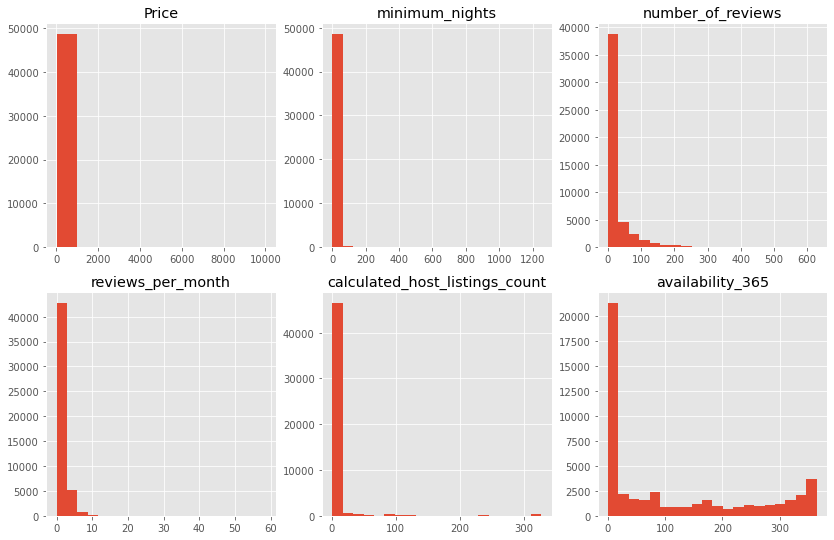

In [421]:
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 =fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)

ax1.hist(df.price)
ax1.set_title("Price")


ax2.hist(df.minimum_nights,bins = 20)
ax2.set_title("minimum_nights")
ax3.hist(df.number_of_reviews,bins = 20)
ax3.set_title("number_of_reviews")
ax4.hist(df.reviews_per_month,bins = 20)
ax4.set_title("reviews_per_month")
ax5.hist(df.calculated_host_listings_count,bins = 20)
ax5.set_title("calculated_host_listings_count")
ax6.hist(df.availability_365,bins = 20)
ax6.set_title("availability_365")
plt.show()

In [422]:
skews = ['minimum_nights','number_of_reviews','reviews_per_month',
         'calculated_host_listings_count','availability_365']

df['price']= np.log(df.price)
for x in skews:
    df[x] =np.log(df[x]+1)
    


In [423]:
original_df.head()

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island,name_encode
0,Kensington,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,0,0,1,0,0,0,1
1,Midtown,40.75362,-73.98377,225,1,45,0.38,2,355,1,0,0,0,0,1,0,0,0
2,Harlem,40.80902,-73.94190,150,3,0,0.00,1,365,0,1,0,0,0,1,0,0,1
3,Clinton Hill,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,0,0,1,0,0,0,1
4,East Harlem,40.79851,-73.94399,80,10,9,0.10,1,0,1,0,0,0,0,1,0,0,1


## Split the Dataset

In [424]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

cols =['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month',
      'calculated_host_listings_count','availability_365','Entire home/apt','Private room',
      'Shared room','Bronx','Brooklyn','Manhattan','Queens','Staten Island','name_encode']

X = df.drop(['price'],axis=1).copy()
y = df['price'].copy()

X.head()

#for x in cols:
#    X[x + "_sq"] = X[x].apply(lambda x: pow(x,2))
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the first 5 lines
print(X_test)
print('\n')
print(y_test)


# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

       latitude  longitude  minimum_nights  number_of_reviews  \
0      40.64749  -73.97237        0.693147           2.302585   
1      40.75362  -73.98377        0.693147           3.828641   
2      40.80902  -73.94190        1.386294           0.000000   
3      40.68514  -73.95976        0.693147           5.602119   
4      40.79851  -73.94399        2.397895           2.302585   
...         ...        ...             ...                ...   
48890  40.67853  -73.94995        1.098612           0.000000   
48891  40.70184  -73.93317        1.609438           0.000000   
48892  40.81475  -73.94867        2.397895           0.000000   
48893  40.75751  -73.99112        0.693147           0.000000   
48894  40.76404  -73.98933        2.079442           0.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.190620                        1.945910          5.902633   
1               0.322083                        1.098612       

## Random Forest Classifier

## Linear Regression

In [425]:
# In the following line, "my_LinReg" is instantiated as an "object" of LinearRegression "class"
my_LinReg = LinearRegression()

# Fitting the model to the training dataset
my_LinReg.fit(X_train, y_train)

# Printing Theta0 using attribute "intercept_":
print(my_LinReg.intercept_)

# Printing [Theta1, Theta2, Theta3] using attribute "coef_":
print(my_LinReg.coef_)




-208.11242886018215
[-0.56783891 -3.18624355 -0.1176388  -0.03803003 -0.06834259 -0.01019395
  0.05453148  0.66552114 -0.11083097 -0.55469017  0.09296641  0.07501681
  0.38342535  0.18713393 -0.73854249 -0.04059493]


In [426]:
# Predictions on the testing set
predict_price = my_LinReg.predict(X_test)

print(predict_price)


# NOT SURE IF NEEDED
# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, predict_price)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print(rmse)

#using a cross validation with 10 fold to confirm the accuracy of the RMSE
my_linreg = LinearRegression()
mse_list = cross_val_score(my_linreg,X,y,cv=10,scoring='neg_mean_squared_error')
print("\nUsing Cross Validation with 10 shuffles to confirm RMSE result")
print("-----------------------------------------------------------------")
print(mse_list)

pos_mse = -mse_list
rmse_list = np.sqrt(pos_mse)

print("\nThe Average RMSE Result from 10-fold Cross Validation ")
print("-----------------------------------------------------------------")
print("RMSE Average: " + str(rmse_list.mean()))

[4.52319235 4.47233823 4.82313445 ... 4.97247204 4.18349101 4.22512456]
0.4856360940573079

Using Cross Validation with 10 shuffles to confirm RMSE result
-----------------------------------------------------------------
[-0.26711774 -0.21361124 -0.21243505 -0.22393854 -0.23452887 -0.23588636
 -0.23027193 -0.24778822 -0.24439397 -0.28228782]

The Average RMSE Result from 10-fold Cross Validation 
-----------------------------------------------------------------
RMSE Average: 0.48864263826812665


In [430]:
my_randforest = RandomForestRegressor()
my_randforest.fit(X_train,y_train)
prediction = my_randforest.predict(X_test)
rfr_mse= metrics.mean_squared_error(y_test,prediction)
rfr_rmse = np.sqrt(rfr_mse)
print(rfr_rmse)

0.4395246780473453


In [359]:
original_df = original_df[original_df.price < 601].copy()
original_df = original_df[original_df.minimum_nights < 10].copy()
original_df = original_df[original_df.number_of_reviews < 100]
original_df.describe()


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,...,Westerleigh,Whitestone,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside
count,38178.000000,38178.000000,38178.000000,38178.000000,38178.000000,38178.000000,38178.000000,38178.000000,38178.000000,38178.000000,...,38178.000000,38178.000000,38178.000000,38178.000000,38178.000000,38178.000000,38178.000000,38178.000000,38178.0,38178.000000
mean,40.728090,-73.950168,134.180837,2.656635,15.443894,1.045146,3.502934,93.750249,0.492640,0.482686,...,0.000052,0.000288,0.000838,0.084839,0.000026,0.003196,0.002122,0.000236,0.0,0.003877
std,0.055813,0.047534,94.786004,1.704926,21.946015,1.479704,23.006527,124.324416,0.499952,0.499707,...,0.007238,0.016972,0.028940,0.278646,0.005118,0.056440,0.046013,0.015352,0.0,0.062142
min,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,40.689030,-73.981980,69.000000,1.000000,1.000000,0.050000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,40.721320,-73.954210,100.000000,2.000000,5.000000,0.410000,1.000000,18.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,40.763238,-73.933610,175.000000,3.000000,20.000000,1.490000,2.000000,173.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,40.913060,-73.712990,600.000000,9.000000,99.000000,27.950000,327.000000,365.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [360]:
def change_price(price):
    if price <= 25:
        return "below_25"
    elif price <= 50:
        return "between_25_to_50"
    elif price <= 100:
        return "between_50_to_100"
    elif price <= 200:
        return "between_100_to_200"
    elif price <= 400:
        return "between_200_to_400"
    else:
        return "between_400_to_600"
    
    
original_df['price'] = original_df['price'].apply(lambda x: change_price(x))

original_df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,...,Westerleigh,Whitestone,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside
0,40.64749,-73.97237,between_100_to_200,1,9,0.21,6,365,0,1,...,0,0,0,0,0,0,0,0,0,0
1,40.75362,-73.98377,between_200_to_400,1,45,0.38,2,355,1,0,...,0,0,0,0,0,0,0,0,0,0
2,40.80902,-73.94190,between_100_to_200,3,0,0.00,1,365,0,1,...,0,0,0,0,0,0,0,0,0,0
5,40.74767,-73.97500,between_100_to_200,3,74,0.59,1,129,1,0,...,0,0,0,0,0,0,0,0,0,0
10,40.80316,-73.96545,between_100_to_200,5,53,0.43,1,6,1,0,...,0,0,0,0,0,0,0,0,0,0


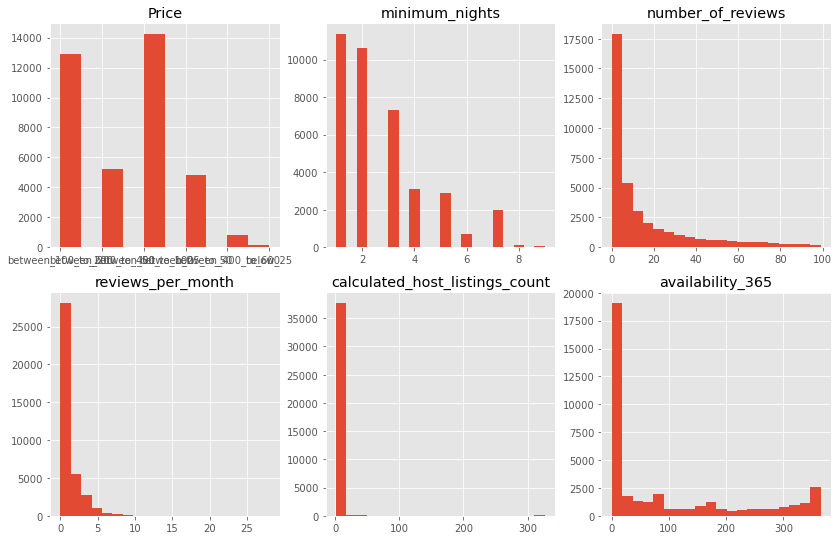

In [361]:
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 =fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)

ax1.hist(original_df.price,)
ax1.set_title("Price")


ax2.hist(original_df.minimum_nights,bins = 20)
ax2.set_title("minimum_nights")
ax3.hist(original_df.number_of_reviews,bins = 20)
ax3.set_title("number_of_reviews")
ax4.hist(original_df.reviews_per_month,bins = 20)
ax4.set_title("reviews_per_month")
ax5.hist(original_df.calculated_host_listings_count,bins = 20)
ax5.set_title("calculated_host_listings_count")
ax6.hist(original_df.availability_365,bins = 20)
ax6.set_title("availability_365")
plt.show()

In [362]:
original_df.shape

(38178, 238)

## Logistic Regression - WIP

In [363]:
original_df = original_df.drop(columns=['reviews_per_month','calculated_host_listings_count'])
original_df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365,Entire home/apt,Private room,Shared room,Bronx,...,Westerleigh,Whitestone,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside
0,40.64749,-73.97237,between_100_to_200,1,9,365,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40.75362,-73.98377,between_200_to_400,1,45,355,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,40.80902,-73.94190,between_100_to_200,3,0,365,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,40.74767,-73.97500,between_100_to_200,3,74,129,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,40.80316,-73.96545,between_100_to_200,5,53,6,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [364]:
X = original_df.drop(['price'],axis=1).copy()
y = original_df['price'].copy()

X.head()


print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

       latitude  longitude  minimum_nights  number_of_reviews  \
0      40.64749  -73.97237               1                  9   
1      40.75362  -73.98377               1                 45   
2      40.80902  -73.94190               3                  0   
5      40.74767  -73.97500               3                 74   
10     40.80316  -73.96545               5                 53   
...         ...        ...             ...                ...   
48889  40.69137  -73.80844               1                  0   
48890  40.67853  -73.94995               2                  0   
48891  40.70184  -73.93317               4                  0   
48893  40.75751  -73.99112               1                  0   
48894  40.76404  -73.98933               7                  0   

       availability_365  Entire home/apt  Private room  Shared room  Bronx  \
0                   365                0             1            0      0   
1                   355                1             0         

In [365]:
# LOGISTIC REGRESSION NEEDS WORK, PROCESSING TAKES TOO LONG

# "my_logreg" is instantiated as an "object" of LogisticRegression "class". 
my_logreg = LogisticRegression(max_iter=1000)

# Training ONLY on the training set:
my_logreg.fit(X_train, y_train)

# Testing on the testing set:
y_predict_lr = my_logreg.predict(X_test)
print(y_predict_lr)

# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 

score_lr = accuracy_score(y_test, y_predict_lr)

print(score_lr)

['between_200_to_400' 'between_100_to_200' 'between_50_to_100' ...
 'between_50_to_100' 'between_25_to_50' 'between_50_to_100']
0.5635585821547058


C:\Users\sean_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNN

In [366]:
# Instantiating KNeighborsClassifier with an list of different K values:

k = [3,5,15,25]

for i in k:
    my_knn = KNeighborsClassifier(n_neighbors = i)

    # Training set
    my_knn.fit(X_train, y_train)

    # Testing on the testing set:
    y_predict_knn = my_knn.predict(X_test)

    print(y_predict_knn)

    # find the accuracy of knn:
    accuracy_knn = accuracy_score(y_test, y_predict_knn)
    print("The accuracy using KNN Algorithm with k =",i, "is", "{:.1f}".format(accuracy_knn * 100), "%")
    

['between_200_to_400' 'between_100_to_200' 'between_100_to_200' ...
 'between_100_to_200' 'between_50_to_100' 'between_100_to_200']
The accuracy using KNN Algorithm with k = 3 is 44.1 %
['between_200_to_400' 'between_100_to_200' 'between_50_to_100' ...
 'between_100_to_200' 'between_50_to_100' 'between_50_to_100']
The accuracy using KNN Algorithm with k = 5 is 44.3 %
['between_100_to_200' 'between_100_to_200' 'between_50_to_100' ...
 'between_100_to_200' 'between_25_to_50' 'between_100_to_200']
The accuracy using KNN Algorithm with k = 15 is 46.6 %
['between_100_to_200' 'between_100_to_200' 'between_50_to_100' ...
 'between_100_to_200' 'between_25_to_50' 'between_100_to_200']
The accuracy using KNN Algorithm with k = 25 is 46.3 %


# Decision Tree

In [182]:
# "my_decisiontree" is instantiated as an "object" of DecisionTreeClassifier "class". 
my_decisiontree = DecisionTreeClassifier(random_state=5)

# We can use the method "fit" of the objects "my_decisiontree" along with training dataset and labels to train the model.
my_decisiontree.fit(X_train, y_train)

# Testing on the testing set:
y_predict_dt = my_decisiontree.predict(X_test)

# percent of correct predictions:
accuracy_dt = accuracy_score(y_test, y_predict_dt)

print("The accuracy using Decision Tree is", "{:.1f}".format(accuracy_dt * 100), "%")


The accuracy using Decision Tree is 48.2 %


In [183]:
## Using Random Forest Classifier with parameters: n_estimators = 19, bootstrap = True, random_state=3
my_RandomForest = RandomForestClassifier(n_estimators = 55, bootstrap = True, random_state=3, 
                                         min_samples_split = 3, min_samples_leaf =2)

my_RandomForest.fit(X_train, y_train)

y_predict_rf = my_RandomForest.predict(X_test)

print(y_predict_rf)

# calculate final accuracy
accuracy_rf = accuracy_score(y_test, y_predict_rf)

print("The accuracy is", "{:.1f}".format(accuracy_rf * 100), "%")


['between_100_to_200' 'between_100_to_200' 'between_100_to_200' ...
 'between_50_to_100' 'between_25_to_50' 'between_25_to_50']
The accuracy is 59.7 %
